# Neural Network Classification with TensorFlow

### Introduction to Neural Network Classification with TensorFlow

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

#### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})

In [8]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
circles['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

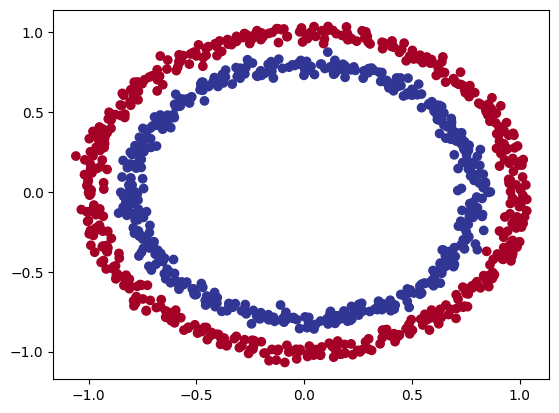

In [9]:
# Visualize with plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

### Input and output shapes

In [10]:
# Check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
len(X), len(y)

(1000, 1000)

In [12]:
# View the first example of the features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [13]:
# X, y = X/255.,y/255.

### Steps in modeling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. Create a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model-defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model-letting the model try to find patterns in the data (how does X get to y).
4. Evaluate the model
5. Tweak
6. Evaluate

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [14]:
# Import TensorFlow Libraries
import tensorflow as tf

tf.__version__

'2.13.0'

### Model 1

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 1)),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(3, activation="softmax")
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.0258 - accuracy: 0.4690
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0622 - accuracy: 0.4660
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.7544 - accuracy: 0.4660
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.5260
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5060


In [18]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5340


[0.6933115720748901, 0.5339999794960022]

### Model 1 Tweak

In [16]:
# Let's try to improve our model
model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5130
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4560
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4720
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4550
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5090
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4720
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4820
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4800


In [17]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5340


[0.6933115720748901, 0.5339999794960022]

### Model 2

In [19]:
# Let's try to improve our model

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 1)),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(3, activation="softmax")
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7689 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7724 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5030
Epoch 11/

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

### Improve our model ahead

Let's look into the bag of tricks to see how to improve our model

1. Create a model-We might add more layers or increase the number of hidden units within a layer.
2. Compile the model - Here we might to choose a different optimization function such as Adam instead of SGD.
    - Loss-How wrong your model's predictions are compared to the truth labels (you want to minimize this).
    - Optimizer-How your model should update its internal patterns to better its predictions.
    - Metrics-Human interpretable values for how well your model is doing.  
3. Fit the model - Perhaps we might fit our model for more epochs (leave it training for longer). 
    - Epochs-How many times the model will go through all the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_3 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 1)),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(3, activation="softmax"),
    tf.keras.layers.Dense(100),  # Add 100 dense neurons
    tf.keras.layers.Dense(10),  # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1)

In [ ]:
# Evaluate the model
model_3.evaluate(X, y)

### To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in trained model, features (X) and label (y)    
* Create a meshgrid to the different X values
* Make predictions across meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np
import matplotlib as mpl

In [ ]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model prediction on X.
    
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2-D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class 
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    cmap = mpl.colormaps['RdYlBu']  # viridis'] # plt.cm.get_cmap("Spectral")
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=mpl.colormaps.get_cmap(cmap), alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=mpl.colormaps.get_cmap(cmap))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

xx, yy

In [ ]:
# Let's see if our model can be used for a regression problem.
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)  # y = X + 100

#Split our regression data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_3 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 1)),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(3, activation="softmax"),
    tf.keras.layers.Dense(100),  # Add 100 dense neurons
    tf.keras.layers.Dense(10),  # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [20]:
import tensorflow as tf

print(tf.__version__)

2.13.0


In [27]:
from sklearn.datasets import make_circles

# Make circles
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [28]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [29]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [30]:
import pandas as pd

circles = pd.DataFrame({'X0': X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [31]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

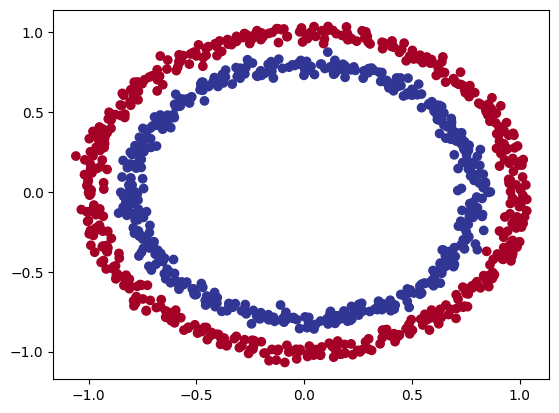

In [35]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('RdYlBu'))
plt.show()

In [36]:
X.shape, y.shape

((1000, 2), (1000,))

In [37]:
len(X), len(y)

(1000, 1000)

In [38]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Model 1

In [39]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.6899 - accuracy: 0.4590
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7245 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5060
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4970


In [40]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

### Model 2

In [43]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [44]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000


[0.6940929293632507, 0.5]

### Model 3

In [45]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.3522 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5070
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5220
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4560
Epoch 11/

In [52]:
import numpy as np


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min(), X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min(), X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    if model.output_shape[-1] > 1:
        print("Doing multiclass classification...")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.get_cmap("RdYlBu"), alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.get_cmap("RdYlBu"))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification...


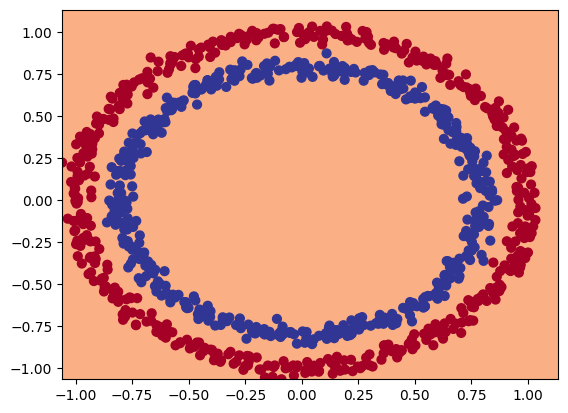

In [54]:
plot_decision_boundary(model_3, X, y)

In [57]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[: 150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[: 150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\deolg\Projects\tensorflow-professional-certification\.venv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\deolg\Projects\tensorflow-professional-certification\.venv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\deolg\Projects\tensorflow-professional-certification\.venv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\deolg\Projects\tensorflow-professional-certification\.venv\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\deolg\Projects\tensorflow-professional-certification\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\deolg\Projects\tensorflow-professional-certification\.venv\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_4' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_4' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [58]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(optimizer='adam',
                loss=tf.keras.losses.mae,
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 3ms/step - loss: 301.4649 - mae: 301.4649
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 173.0395 - mae: 173.0395
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 62.1248 - mae: 62.1248
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 75.2504 - mae: 75.2504
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 75.9226 - mae: 75.9226
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.7663 - mae: 47.7663
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 47.6292 - mae: 47.6292
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 41.8488 - mae: 41.8488
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 42.8522 - mae: 42.8522
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 41.9720 - mae: 41.9720
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 3ms/step


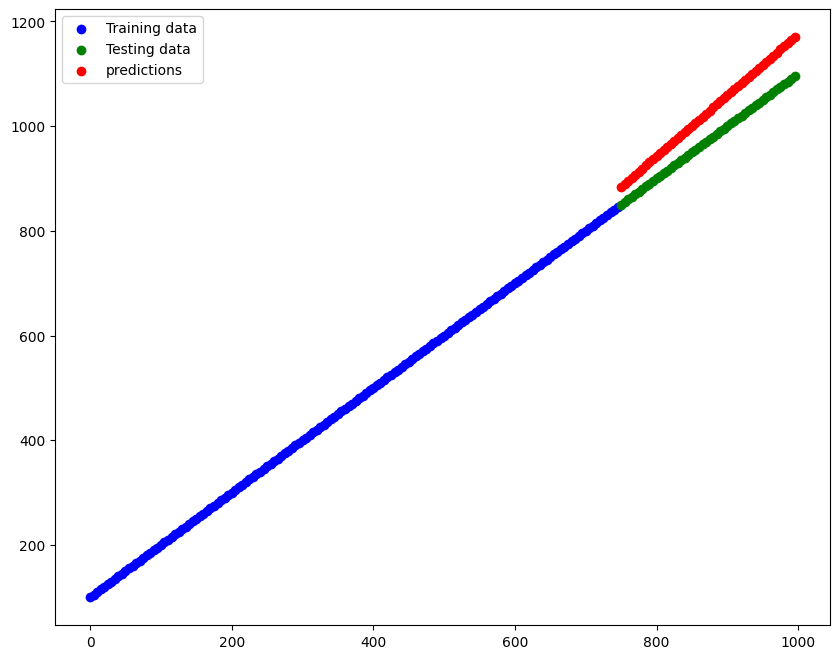

In [61]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 8))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='predictions')
plt.legend()
plt.show()

### Model 4

In [62]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 4.2653 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0833 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9760 - accuracy: 0.4450
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8464 - accuracy: 0.4330
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6091 - accuracy: 0.4290
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4425 - accuracy: 0.4300
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.2080 - accuracy: 0.4440
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9484 - accuracy: 0.4620
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5091 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6760 - accuracy: 0.4980
Epoch 11/

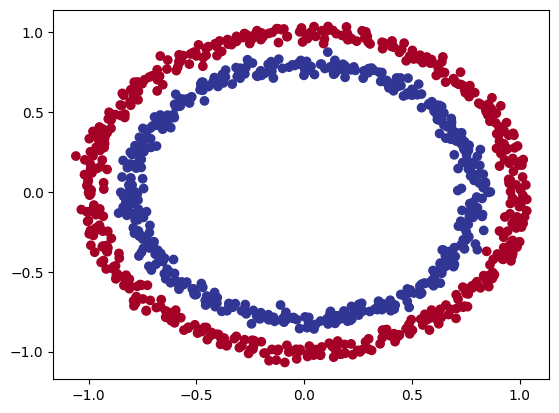

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap("RdYlBu"));

313/313 [==============================] - 1s 2ms/step
Doing binary classification...


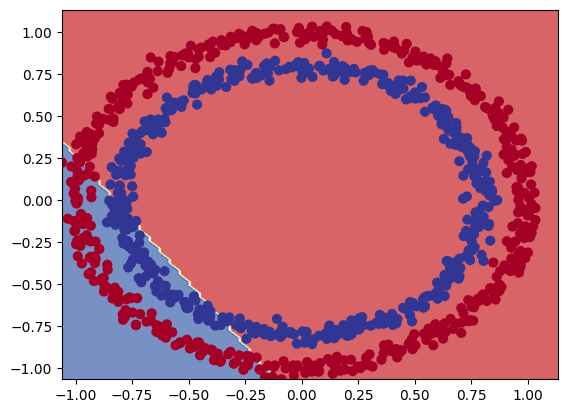

In [64]:
plot_decision_boundary(model_4, X, y);

### Model 5

In [66]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.1431 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5496 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4638 - accuracy: 0.4640
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4029 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3500 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3061 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2647 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2261 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1909 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1552 - accuracy: 0.4730
Epoch 11/

### Model 6

In [68]:
tf.random.set_seed(42);

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 2ms/step - loss: 0.9781 - accuracy: 0.3850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8620 - accuracy: 0.3910
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8262 - accuracy: 0.3450
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8058 - accuracy: 0.3280
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.3670
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7832 - accuracy: 0.3580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7746 - accuracy: 0.3590
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7682 - accuracy: 0.3630
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7620 - accuracy: 0.3680
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7572 - accuracy: 0.3760
Epoch 11/

In [69]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.9000


[0.2467513382434845, 0.8999999761581421]

313/313 [==============================] - 0s 1ms/step
Doing binary classification...


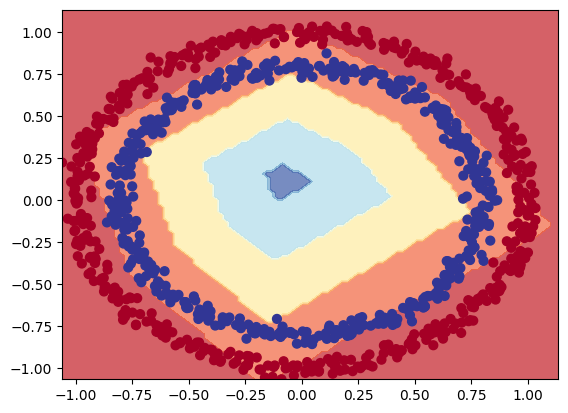

In [70]:
plot_decision_boundary(model_6, X, y)

### Model 7

In [71]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=100, verbose=0)

In [72]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8870


[0.32893115282058716, 0.8870000243186951]

313/313 [==============================] - 0s 1ms/step
Doing binary classification...


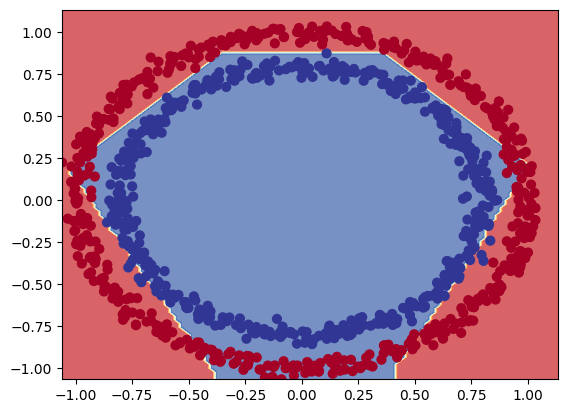

In [73]:
plot_decision_boundary(model_7, X, y)

In [74]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

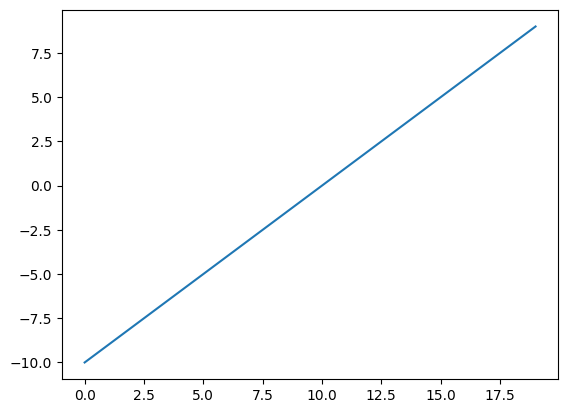

In [75]:
plt.plot(A)

In [77]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

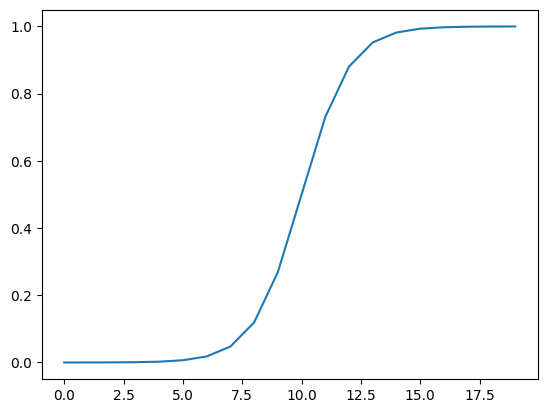

In [78]:
plt.plot(sigmoid(A));

In [79]:
def relu(x):
    return tf.maximum(x, 0)


relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

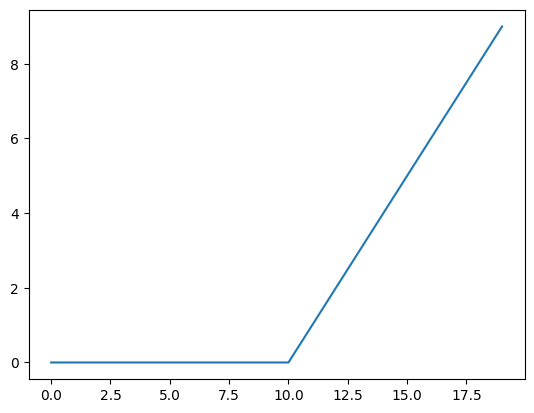

In [80]:
plt.plot(relu(A));

In [81]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

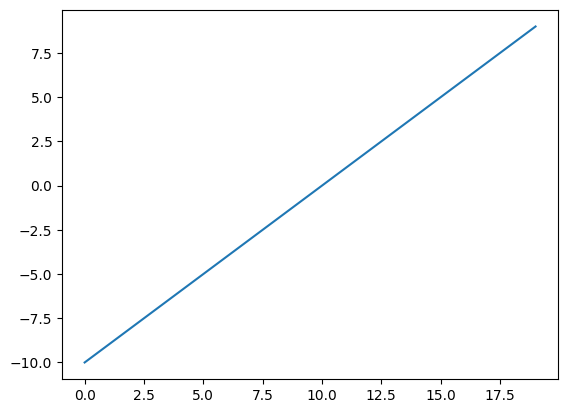

In [82]:
plt.plot(tf.keras.activations.linear(A))

In [83]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluating and improving our classification model

In [85]:
len(X)

1000

In [86]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

### Model 8

In [90]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 0.6941 - accuracy: 0.5360
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5780
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.5380
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6380
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.6870
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.8250
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.8980
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.9540
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.9820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9870
Epoch 11/

In [91]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100 * accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000
Model loss on the test set: 0.008995997719466686
Model accuracy on the test set: 100.00%


313/313 [==============================] - 1s 2ms/step
Doing binary classification...
313/313 [==============================] - 0s 1ms/step
Doing binary classification...


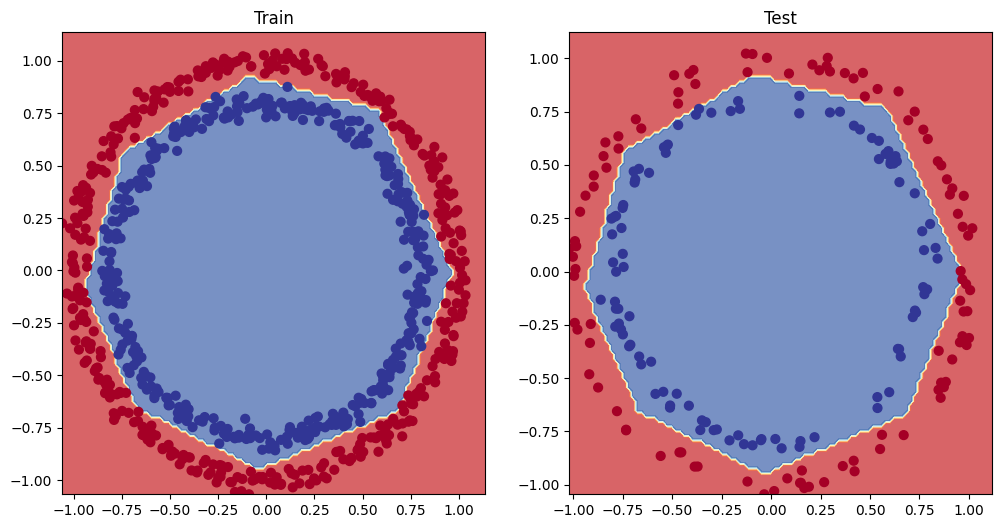

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### Plot the loss curves

In [93]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.694088,0.536
1,0.674108,0.578
2,0.665058,0.538
3,0.649336,0.638
4,0.624741,0.687
...,...,...
95,0.012939,0.996
96,0.013128,0.996
97,0.011108,0.998
98,0.010901,0.995


Text(0.5, 1.0, 'Model_8 training curves')

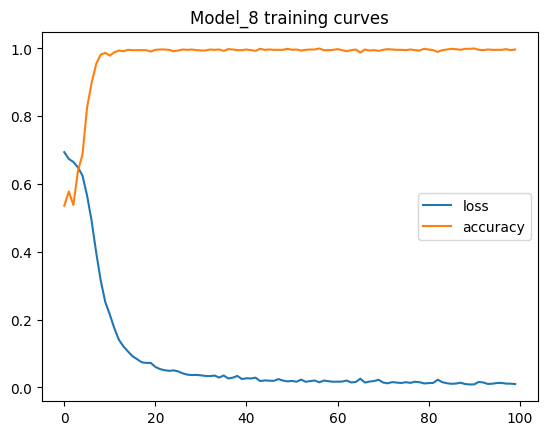

In [94]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

### Finding the best learning rate

### Model 9

In [96]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 3s 3ms/step - loss: 0.6868 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

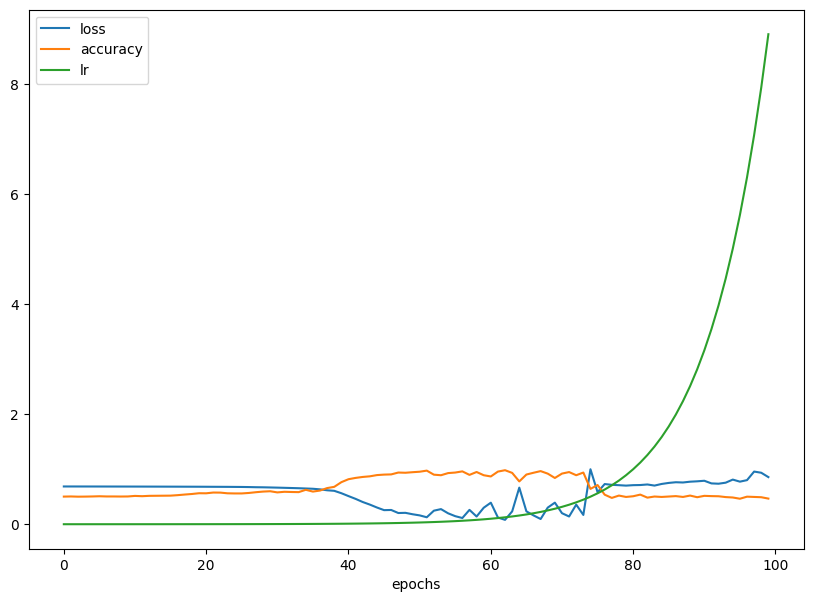

In [97]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

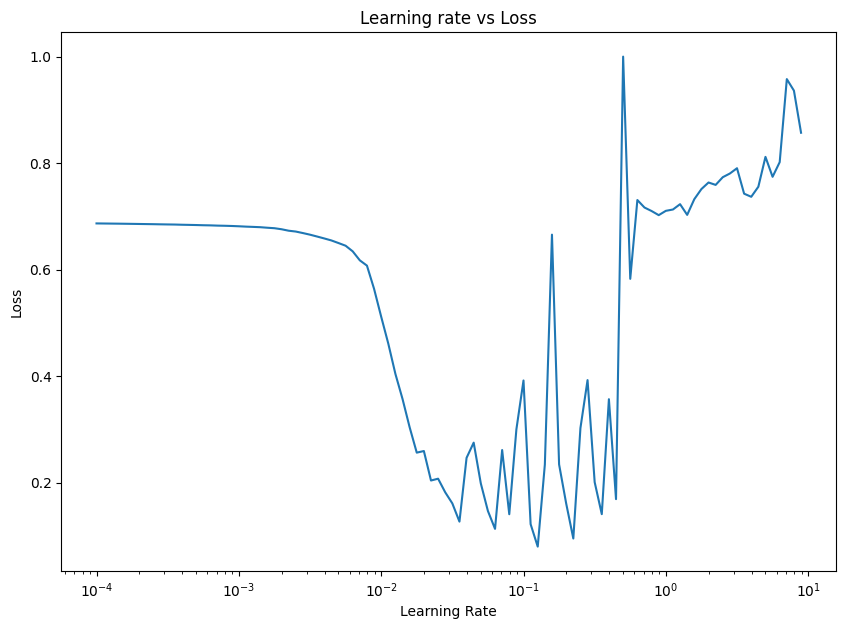

In [99]:
lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show()

In [100]:
10 ** 0, 10 ** -1, 10 ** -2, 10 ** -3, 10 ** -4

(1, 0.1, 0.01, 0.001, 0.0001)

### Model 10

In [101]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 8ms/step - loss: 0.6933 - accuracy: 0.5312
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5625
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5962
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6637
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.7237
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7925
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8163
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8238
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.8763
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.9112
Epoch 11/20
25/25 [

In [102]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9800


[0.07698801904916763, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
Doing binary classification...
313/313 [==============================] - 0s 1ms/step
Doing binary classification...


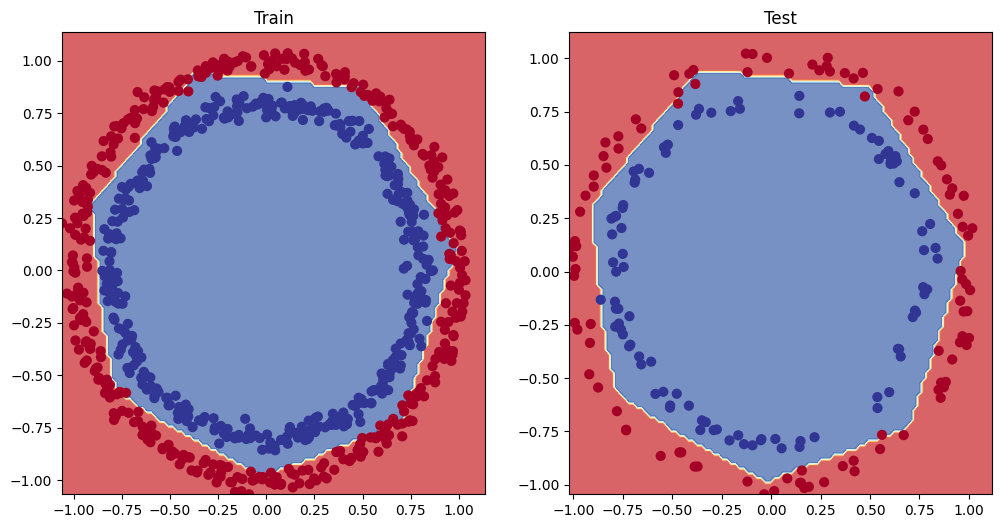

In [104]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [105]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9800
Model loss on test set: 0.07698801904916763
Model accuracy on test set: 98.00%


In [107]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [109]:
y_preds[:10]

array([[9.7238243e-01],
       [9.9875158e-01],
       [9.9777621e-01],
       [9.9743843e-01],
       [8.5424697e-01],
       [7.4957678e-04],
       [9.3493515e-01],
       [2.9965258e-01],
       [9.9579859e-01],
       [2.6421031e-02]], dtype=float32)

In [110]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [111]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [112]:
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]], dtype=int64)

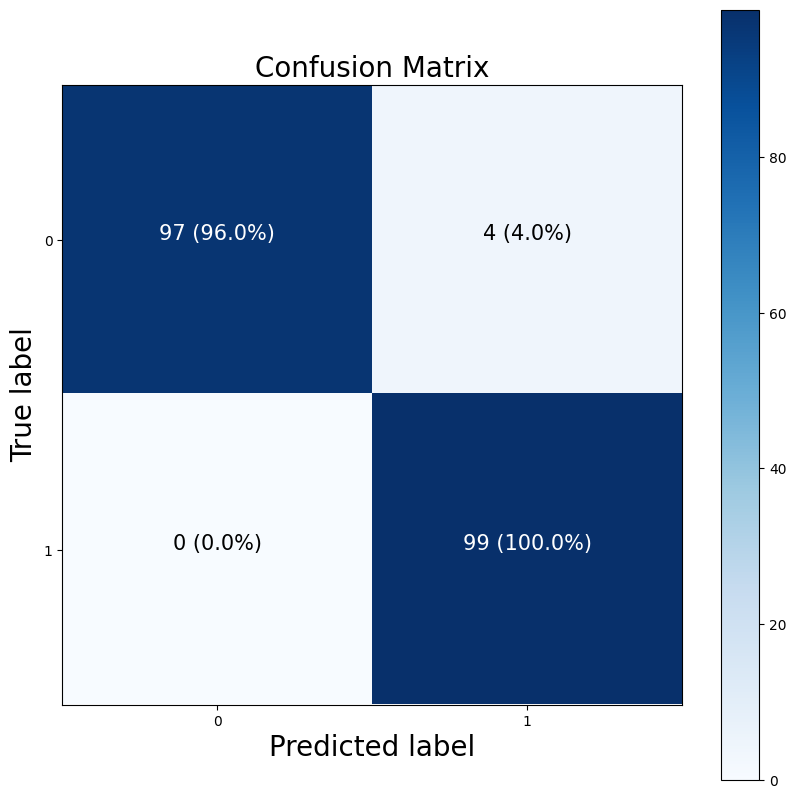

In [113]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

In [114]:
import itertools

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print(i, j)

0 0
0 1
1 0
1 1


## Working with a larger example (multiclass classification)

In [115]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The fata has already been sorted into training and test set for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [116]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [118]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [119]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

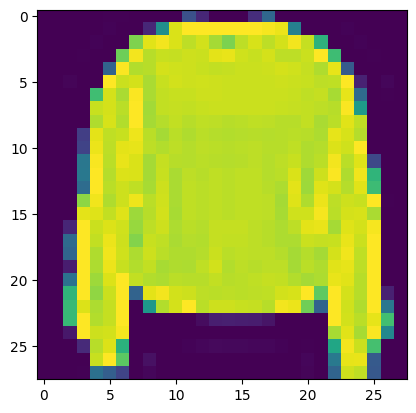

In [121]:
import matplotlib.pyplot as plt

plt.imshow(train_data[7])
plt.show()

In [122]:
train_labels[7]

2

In [123]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

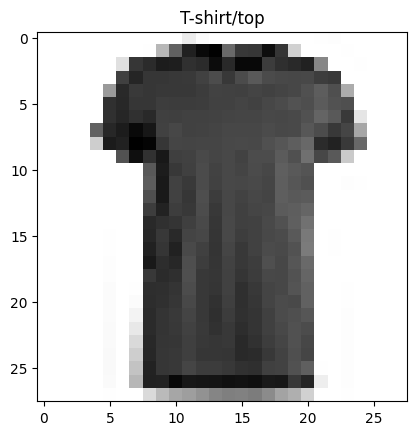

In [124]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])
plt.show()

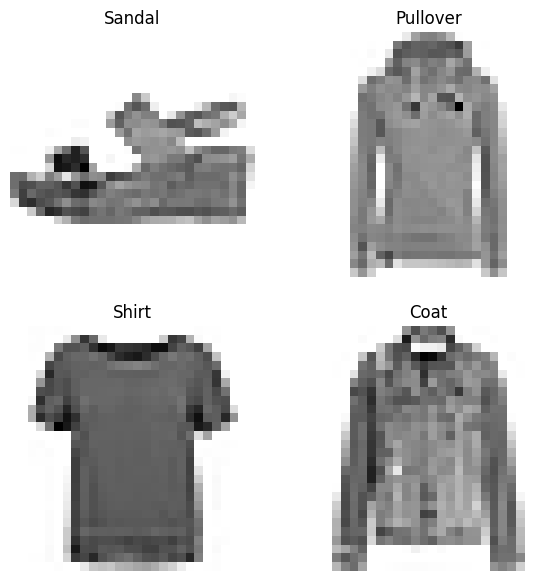

In [129]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Model 10

In [130]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 2.3118 - accuracy: 0.1243 - val_loss: 2.1745 - val_accuracy: 0.1552
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0190 - accuracy: 0.1956 - val_loss: 1.7789 - val_accuracy: 0.2490
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7282 - accuracy: 0.2394 - val_loss: 1.6497 - val_accuracy: 0.2718
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6464 - accuracy: 0.2965 - val_loss: 1.6086 - val_accuracy: 0.3265
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5918 - accuracy: 0.3242 - val_loss: 1.5655 - val_accuracy: 0.3426
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4412 - accuracy: 0.4027 - val_loss: 1.3177 - val_accuracy: 0.4495
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2328 - accuracy: 0.5026 - val_loss: 1.2260 - val_accuracy:

In [131]:
model_11.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
train_data.min(), train_data.max()

(0, 255)

In [133]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

### Model 12

In [135]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3105 - accuracy: 0.4989 - val_loss: 0.9572 - val_accuracy: 0.6101
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7788 - accuracy: 0.7131 - val_loss: 0.7299 - val_accuracy: 0.7510
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6813 - accuracy: 0.7606 - val_loss: 0.6826 - val_accuracy: 0.7584
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6445 - accuracy: 0.7709 - val_loss: 0.6616 - val_accuracy: 0.7665
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6242 - accuracy: 0.7765 - val_loss: 0.6496 - val_accuracy: 0.7726
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6098 - accuracy: 0.7823 - val_loss: 0.6486 - val_accuracy: 0.7690
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5999 - accuracy: 0.7853 - val_loss: 0.6432 - val_accuracy:

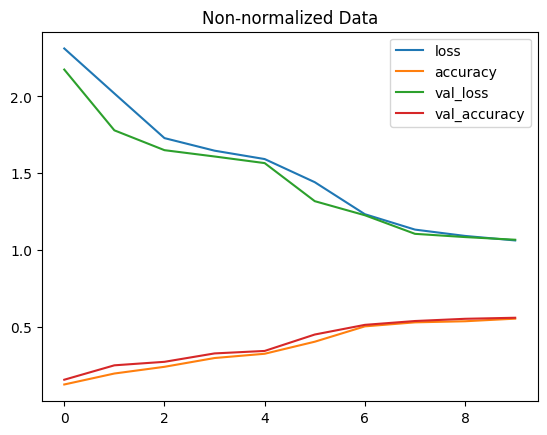

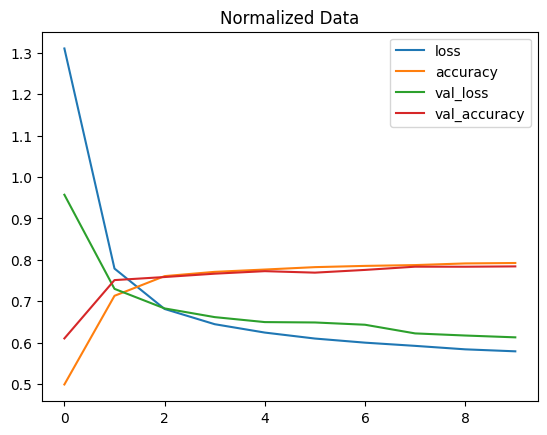

In [137]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data");

### Model 13

In [138]:
tf.random.set_seed(42)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 2ms/step - loss: 1.0680 - accuracy: 0.6094 - val_loss: 0.7124 - val_accuracy: 0.7498 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6385 - accuracy: 0.7708 - val_loss: 0.6425 - val_accuracy: 0.7640 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5842 - accuracy: 0.7933 - val_loss: 0.6125 - val_accuracy: 0.7822 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5565 - accuracy: 0.8062 - val_loss: 0.5723 - val_accuracy: 0.8062 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5448 - accuracy: 0.8094 - val_loss: 0.5836 - val_accuracy: 0.7995 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5359 - accuracy: 0.8117 - val_loss: 0.6088 - val_accuracy: 0.7944 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

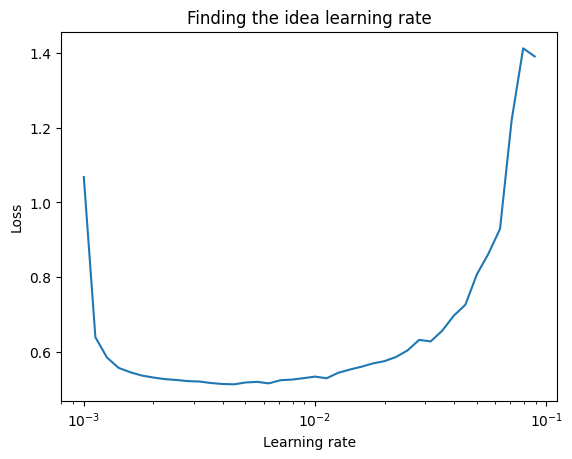

In [139]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (np.arange(40) / 20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the idea learning rate")
plt.show()

### Model 14

In [140]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1181 - accuracy: 0.5688 - val_loss: 0.7945 - val_accuracy: 0.7041
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7333 - accuracy: 0.7277 - val_loss: 0.7435 - val_accuracy: 0.7164
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6892 - accuracy: 0.7378 - val_loss: 0.6923 - val_accuracy: 0.7395
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6636 - accuracy: 0.7461 - val_loss: 0.6775 - val_accuracy: 0.7453
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6409 - accuracy: 0.7606 - val_loss: 0.6525 - val_accuracy: 0.7642
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6265 - accuracy: 0.7726 - val_loss: 0.6560 - val_accuracy: 0.7676
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6200 - accuracy: 0.7771 - val_loss: 0.6671 - val_accuracy:

In [153]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    threshold = (cm.max() + cm.min()) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [143]:
y_preds = model_14.predict(test_data)

y_preds[:5]

313/313 [==============================] - 1s 1ms/step


array([[6.21250322e-08, 3.68850158e-16, 1.96980423e-07, 4.32934105e-11,
        9.62229767e-15, 8.24984685e-02, 1.59275041e-05, 5.40699512e-02,
        2.23303796e-03, 8.61182272e-01],
       [3.82738435e-05, 2.18593132e-14, 8.55888784e-01, 2.70810041e-09,
        1.23028204e-01, 9.10870235e-23, 2.10417788e-02, 2.35739030e-19,
        2.84611679e-06, 1.27805508e-13],
       [8.14827625e-03, 9.81229424e-01, 5.76717503e-06, 1.05253635e-02,
        4.32296446e-07, 1.36244523e-11, 9.00625892e-05, 7.16907721e-07,
        2.17301110e-08, 4.05809623e-14],
       [1.05071608e-02, 9.76633847e-01, 1.20112827e-05, 1.26935467e-02,
        9.45989314e-07, 7.82047829e-11, 1.50643798e-04, 1.89869820e-06,
        5.56711370e-08, 2.56065433e-13],
       [1.09066650e-01, 7.90335162e-06, 1.43124878e-01, 2.20702048e-02,
        1.66531831e-01, 1.12454796e-14, 5.57340503e-01, 2.13011241e-11,
        1.85808237e-03, 7.20849335e-12]], dtype=float32)

In [144]:
y_preds[0].argmax(), class_names[y_preds[0].argmax()]

(9, 'Ankle boot')

In [145]:
y_preds = y_preds.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [146]:
print(y_preds[:10])

[9 2 1 1 6 1 4 6 5 7]


In [147]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[720,   5,  24,  79,  17,   3, 141,   0,  11,   0],
       [ 20, 917,  14,  37,   2,   3,   6,   0,   1,   0],
       [ 25,   0, 650,   7, 218,   1,  89,   0,  10,   0],
       [ 43,  15,   6, 778,  26,   9, 101,   0,  22,   0],
       [  1,   0, 125,  18, 741,   0,  98,   0,  17,   0],
       [  0,   0,   0,   1,   0, 863,   0,  58,  10,  68],
       [137,   0, 133,  47, 292,   2, 377,   0,  12,   0],
       [  0,   0,   0,   0,   0,  23,   0, 907,   0,  70],
       [  2,   0,   1,  13,  56,  20,  14,   3, 887,   4],
       [  0,   0,   0,   0,   1,  18,   0,  39,   8, 934]], dtype=int64)

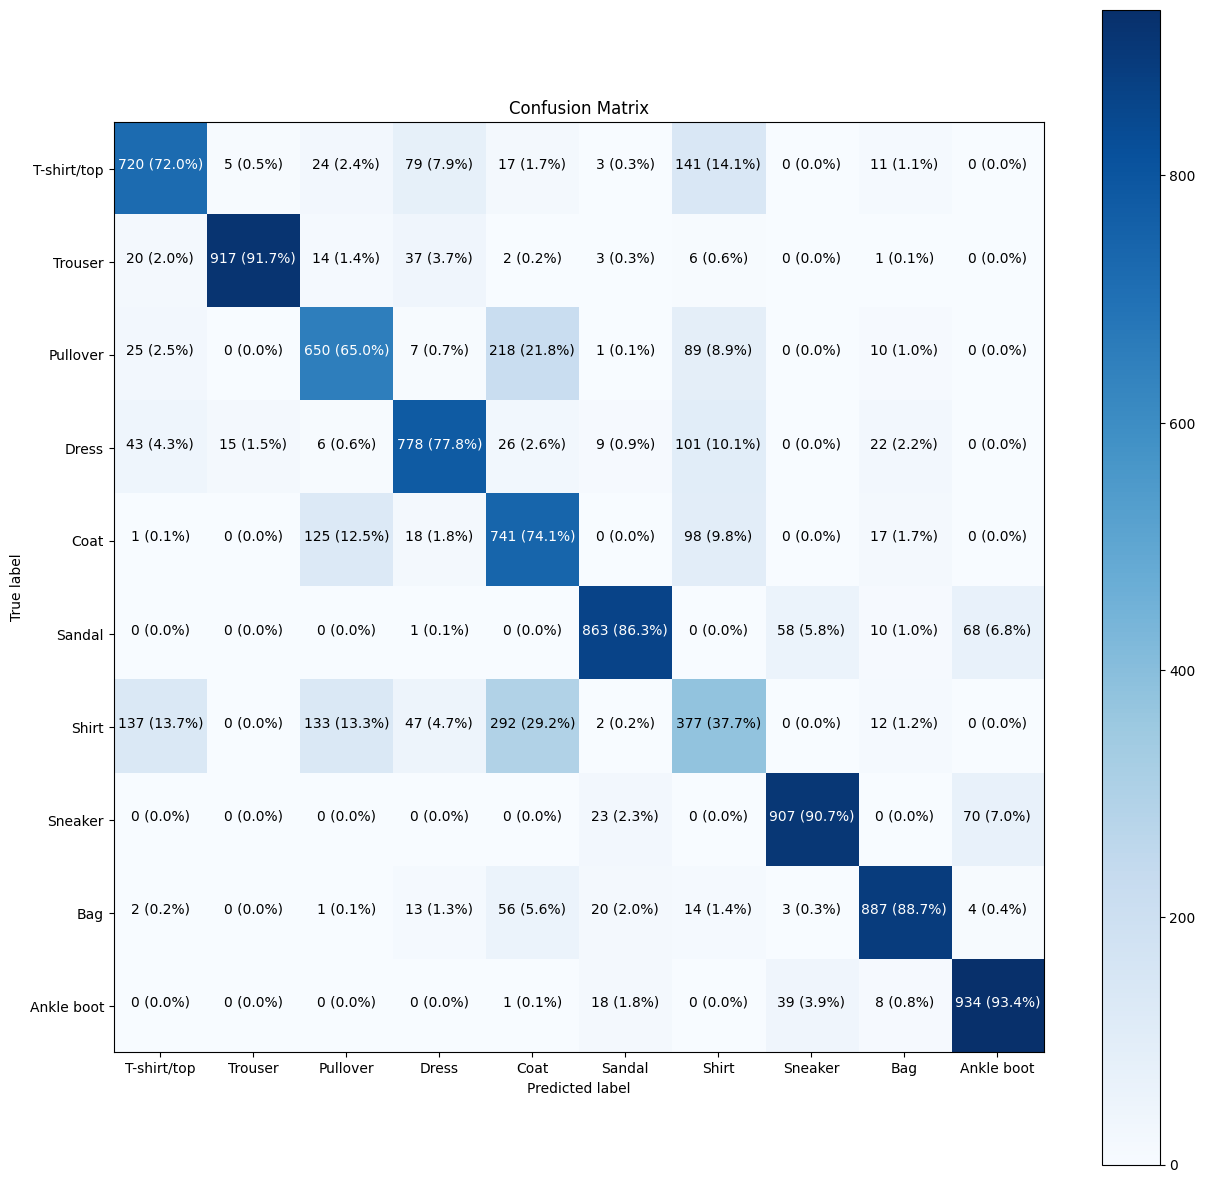

In [154]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [155]:
import random
def plot_random_image(model, images, true_labels, classes):
    i=random.randint(0, len(images))
    
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    if pred_label==true_label:
        color="green"
    else:
        color='red'
        
    plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", color=color)

1/1 [==============================] - 0s 28ms/step


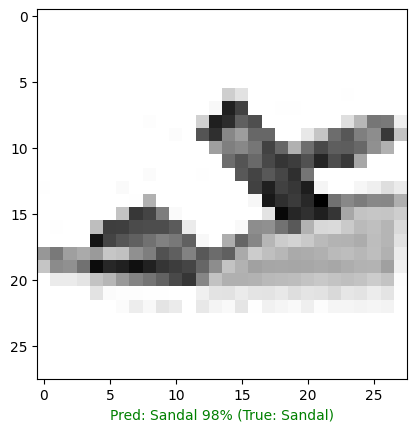

In [163]:
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [164]:
model_14.layers

In [165]:
model_14.layers[1]

In [166]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.77689356,  0.5980007 , -0.3363479 ,  0.01355737],
        [-0.4868833 ,  0.6283346 , -0.775201  ,  0.0371436 ],
        [-1.232099  ,  0.6415035 ,  0.6989725 , -0.00837073],
        ...,
        [-0.5537667 ,  0.10878296,  0.21115203, -0.04695512],
        [-0.16612713,  0.0345377 , -0.35022867,  0.05959447],
        [-0.22120976, -0.19681089,  0.3213304 ,  0.06369917]],
       dtype=float32),
 (784, 4))

In [167]:
biases, biases.shape

(array([ 1.416303  ,  1.0593885 ,  0.40572765, -0.02635437], dtype=float32),
 (4,))

In [168]:
model_14.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 4)                 3140      
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dense_47 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


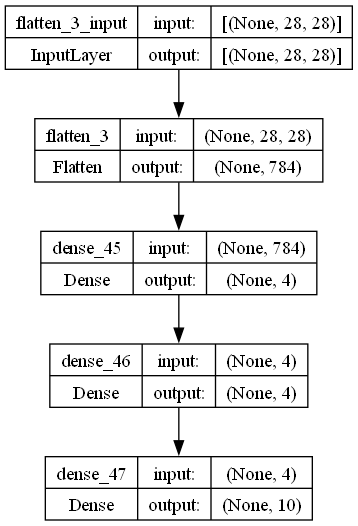

In [169]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)